# Time Series - Electricity Demand

In [7]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

### Parameter 
P = เวลาที่แปรผันกับค่าในอดีตกี่ครั้ง

D = Trend , 0 = ส้นตรง , 1 = linear , 2 = log

Q = ปริมาณี่ไม่พอ

In [8]:
# Import Data
# set date as index
dataFrame = pd.read_csv('../data/IPG2211A2N.csv', index_col=0)
# dataFrame = pd.read_csv('../data/IPG2211A2N.csv')
elecProd = dataFrame.copy()
elecProd.head()

,IPG2211A2N
DATE,
1/1/1985,72.6803
2/1/1985,70.8479
3/1/1985,62.6166
4/1/1985,57.6106
5/1/1985,55.4467


In [9]:
# Convert index to datetime
elecProd.index = pd.to_datetime(elecProd.index)
# Rename Column
elecProd.columns = ['Energy Production']

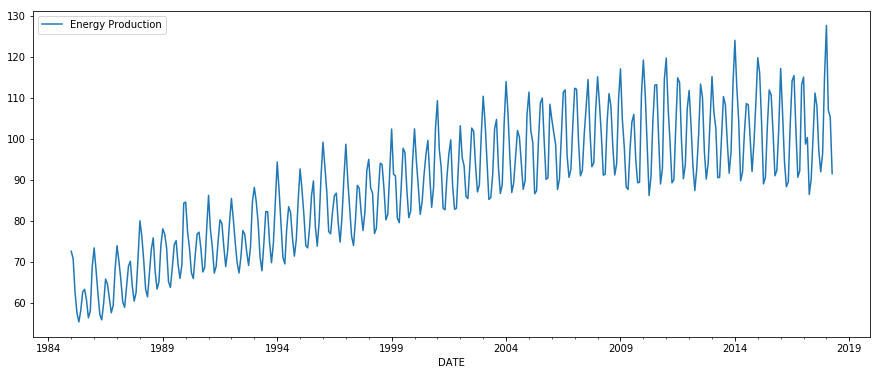

In [10]:
elecProd.plot(figsize=(15, 6))
plt.show()

In [21]:
# Explain TimeSeries and how to set pdq PDQ s

In [12]:
import warnings
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
# p -> Correlation with y for "p" period
# d -> Trend line character, degree of differencing
# q -> Error carry over

p = q = range(0, 3) # 0,1,2

d = range(1,2)  # 1

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# seasonal 12 - > #month of year
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


In [13]:
#Grid Search
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(elecProd,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1841.7226866516958
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1788.8638068118944
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1926.2449147515247
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1843.7113793311096
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1787.224678511052
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1823.6360427521397
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1786.0290999031208
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:1783.7140564096935
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1981.6586771937937
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1799.0803250453132
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:1748.7418837053247
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1890.6487860464356
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1802.1868773271174
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:1746.6359485849912
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:1789.7822412794303
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:1744.820627349482
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:1734.9719179580734
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1935.56220484

# Best PDQ 
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:1688.1797900258991

In [ ]:
#get the lowest AIC this will get the best PDQ

In [15]:
# Explain Model API
mod = sm.tsa.statespace.SARIMAX(elecProd,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3537      0.107      3.292      0.001       0.143       0.564
ma.L1         -0.8142      0.108     -7.536      0.000      -1.026      -0.602
ma.L2         -0.1218      0.094     -1.300      0.194      -0.306       0.062
ar.S.L12       0.1605      0.161      0.996      0.319      -0.155       0.476
ar.S.L24      -0.3468      0.061     -5.667      0.000      -0.467      -0.227
ma.S.L12      -0.8702      0.169     -5.153      0.000      -1.201      -0.539
ma.S.L24       0.1978      0.142      1.391      0.164      -0.081       0.477
sigma2         5.9264      0.390     15.188      0.000       5.162       6.691


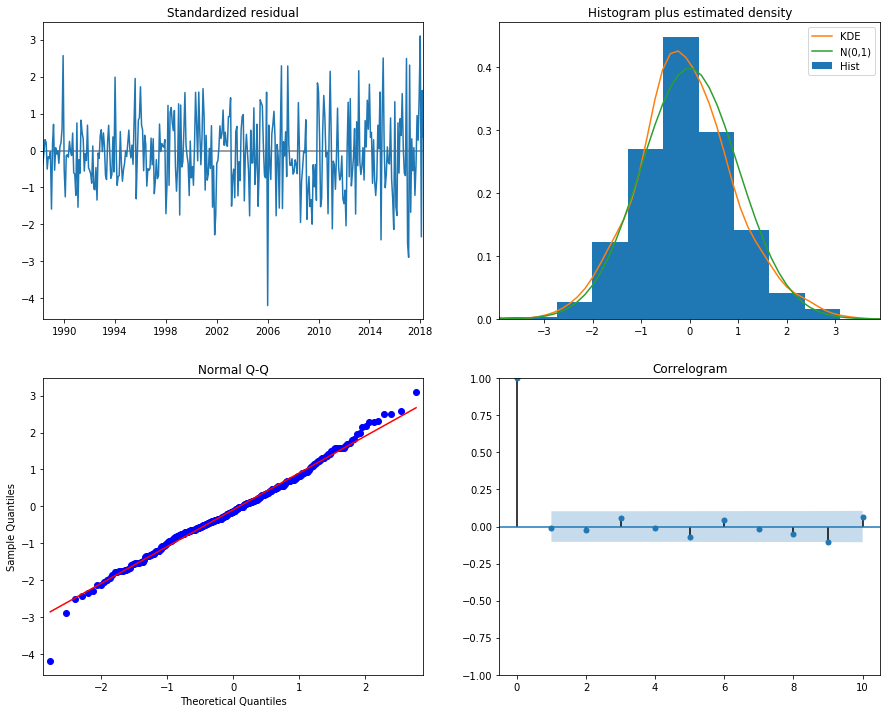

In [16]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Validate Forecast
# dynamic = false , use real data

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

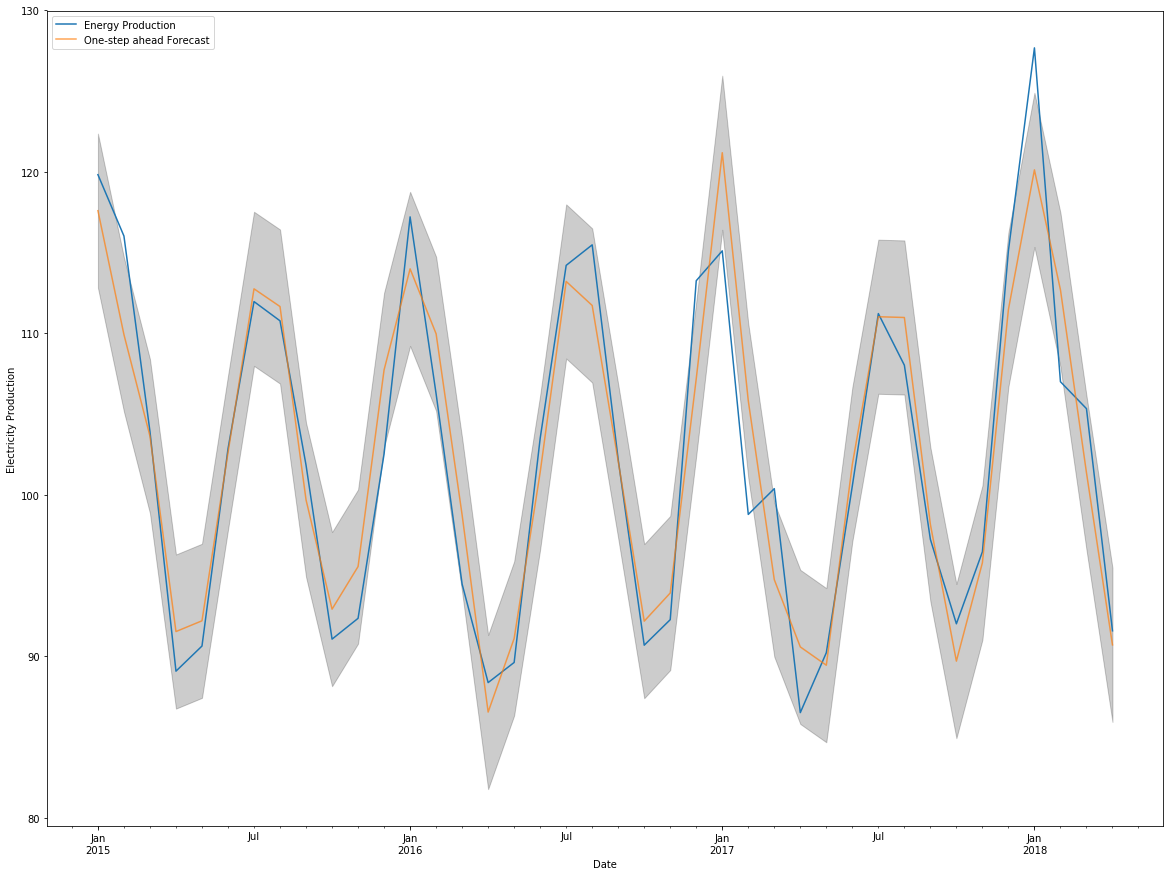

In [18]:
ax = elecProd['2015':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity Production')
plt.legend()

plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_forecasted = pd.DataFrame(y_forecasted)
y_forecasted.columns = ['Energy Production']
y_truth = elecProd['2015-01-01':]
# y_truth
# y_forecasted
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is Energy Production    11.97
dtype: float64


In [20]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

## dynamic = true , use forcast data to forecast ahead

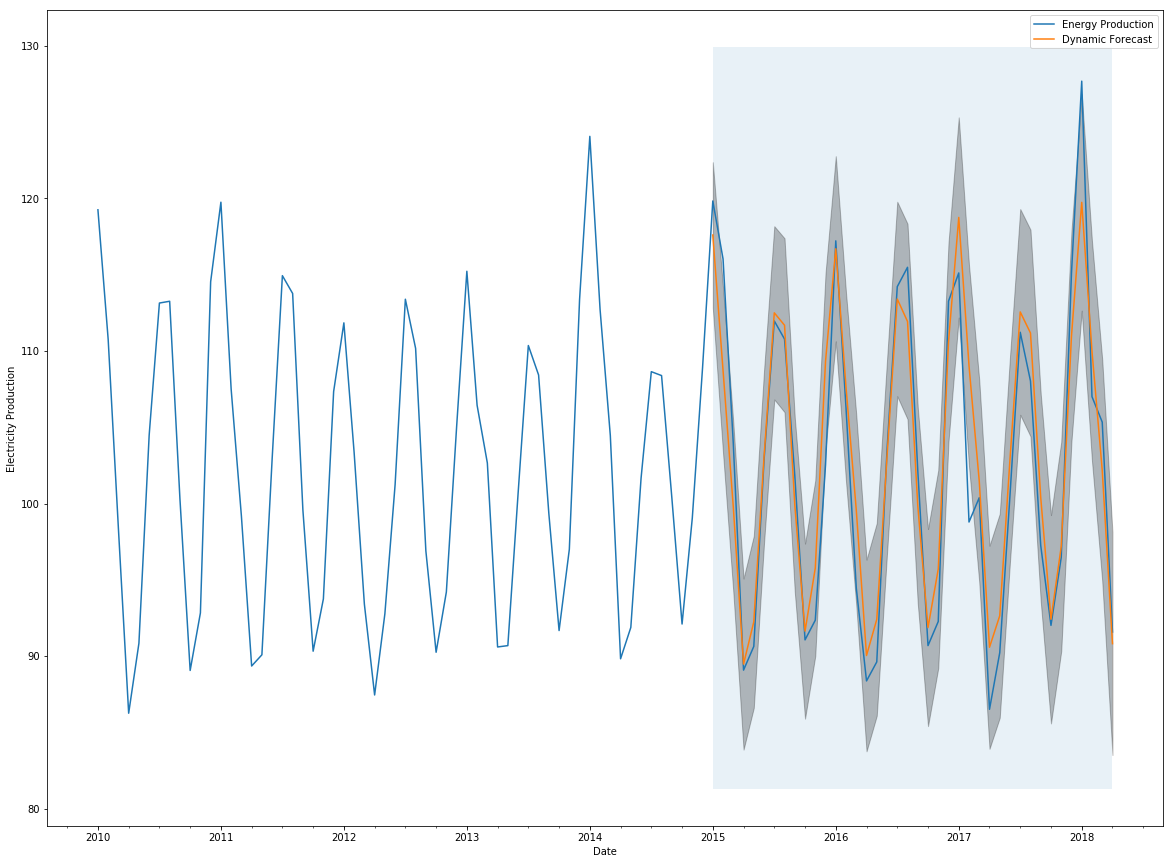

In [21]:
ax = elecProd['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-01-01'), elecProd.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity Production')

plt.legend()
plt.show()

In [22]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_forecasted = pd.DataFrame(y_forecasted)
y_forecasted.columns = ['Energy Production']
y_truth = elecProd['2015-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is Energy Production    12.2
dtype: float64


In [23]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

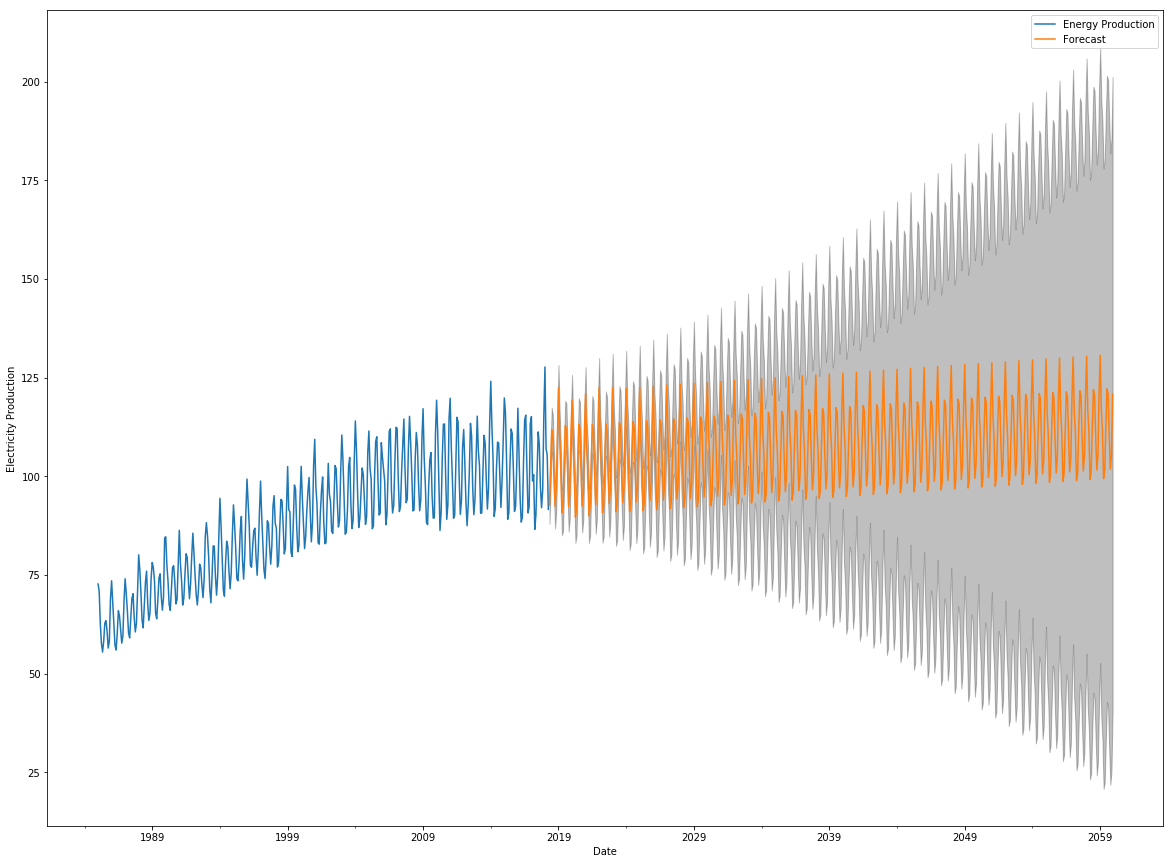

In [77]:
ax = elecProd.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Electricity Production')

plt.legend()
plt.show()